In [105]:
# Audio processing
import librosa
import librosa.display

# Data manipulation and numerical operations
import numpy as np
import pandas as pd

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale  # Normalization

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# File handling
import os

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [106]:
## testing with a file



audio_path = '../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav'

x , sr = librosa.load(audio_path)

print(type(x), type(sr))



print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(661794,) 22050


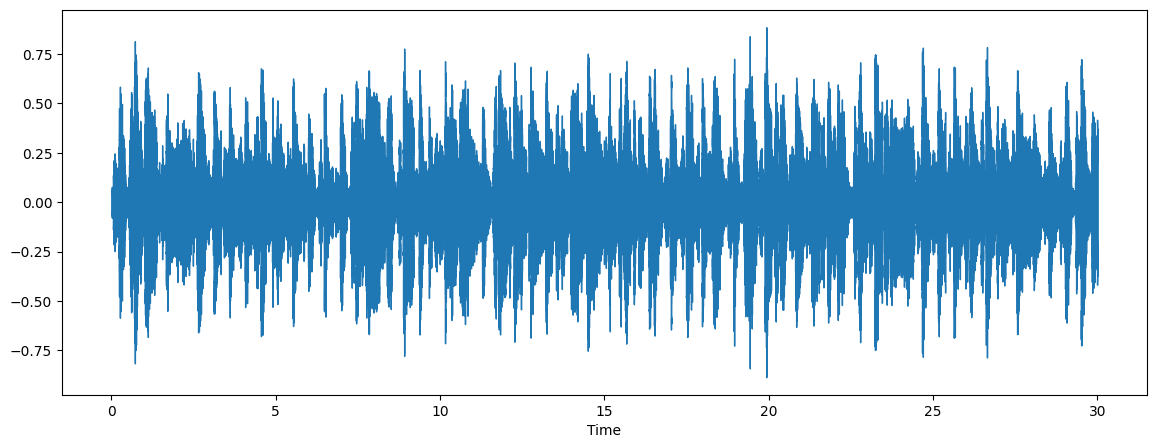

In [107]:
## ploting the file in waveform



plt.figure(figsize=(14, 5))

librosa.display.waveshow(x, sr=sr)

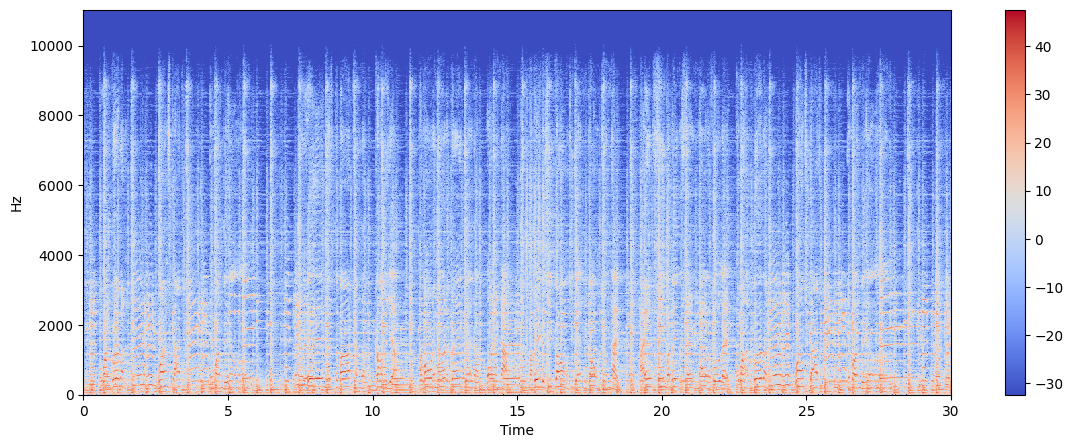

In [108]:
## converting the song into image using Spectrogram



X = librosa.stft(x)

Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 5))

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

plt.colorbar()

### Feature Extraction

##### Zero crossig rate



The zero-crossing rate is the rate of sign-changes along with a signal, i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both speech recognition and music information retrieval. It usually has higher values for highly percussive sounds like those in metal and rock.

16


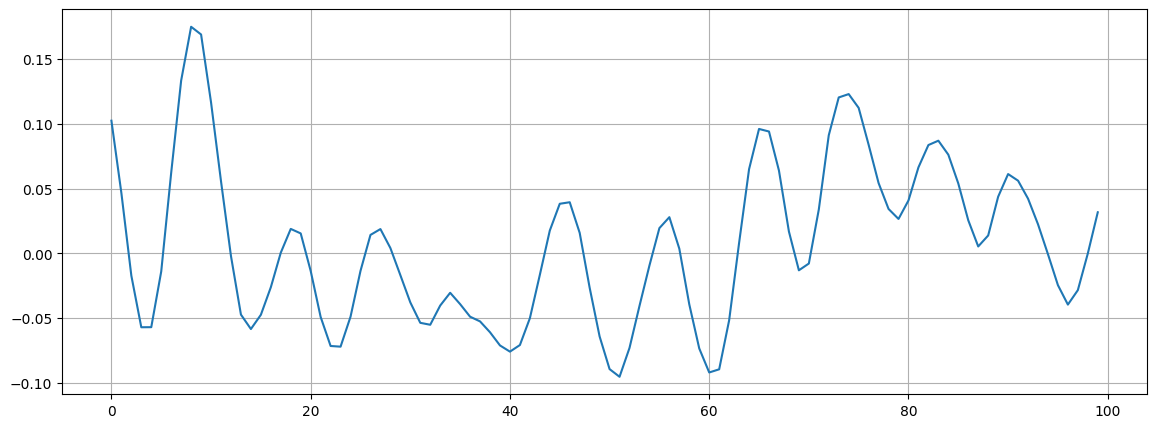

In [109]:




n0 = 9000

n1 = 9100

plt.figure(figsize=(14, 5))

plt.plot(x[n0:n1])

plt.grid()



zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)

print(sum(zero_crossings))

##### Spectral Centroid

It indicates where the ” center of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. Consider two songs, one from a blues genre and the other belonging to metal. Now, as compared to the blues genre song, which is the same throughout its length, the metal song has more frequencies towards the end. So spectral centroid for blues song will lie somewhere near the middle of its spectrum while that for a metal song would be towards its end.

(1293,)


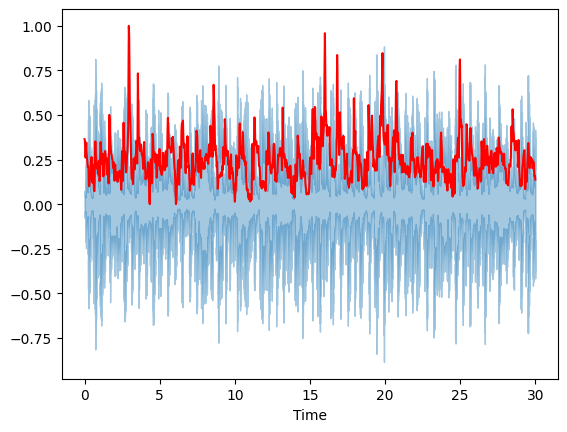

In [110]:
# Assuming `x` and `sr` are already defined:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]  # Correct function name with 'y' instead of 'x'

# Check the shape of spectral centroids
print(spectral_centroids.shape)

# Get the frames range
frames = range(len(spectral_centroids))

# Convert frames to time
t = librosa.frames_to_time(frames)

# Normalize function
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

# Plot the wave and spectral centroids
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()


In [111]:




genre = ['hiphop', 'pop']

In [112]:
## feature extraction funciton



def normalize(x, axis=0):

        return sklearn.preprocessing.minmax_scale(x, axis=axis)



def zero_cross(x):

    n0 = 9000

    n1 = 9100

    zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)

    return sum(zero_crossings)



def spec_center(x, sr):
    # Correct function call: pass audio signal as y=x, sample rate as sr
    spectral_centroids = normalize(librosa.feature.spectral_centroid(y=x, sr=sr)[0])

    # Get the frame indices for spectral centroids
    frames = range(len(spectral_centroids))
    
    # Convert frame indices to time (seconds)
    t = librosa.frames_to_time(frames)  

    # Find the time corresponding to the maximum spectral centroid
    ma = max(spectral_centroids)
    
    return t[np.where(spectral_centroids == ma)[0][0]]


In [113]:
li = []
path = '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original'

for gen in genre:
    for song in os.listdir(os.path.join(path, gen)):
        # Load the audio file
        x, sr = librosa.load(os.path.join(path, gen, song))
        
        # Append the features: zero-crossing rate, spectral centroid, and genre
        li.append([zero_cross(x), round(spec_center(x, sr), 2), gen])


In [114]:
li = np.array(li)

### Implementing svm

In [115]:
X = li[:, 0:2]

y = li[:,2]

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [117]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', random_state = 1)

classifier.fit(X_train,y_train)

SVC(random_state=1)

In [118]:
y_pred = classifier.predict(X_test)

In [119]:
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[ 6, 17],
       [ 3, 14]])

In [120]:
## testing for custom song

import joblib

joblib.dump(classifier, 'model.pkl')



pa = '../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00005.wav'

x, sr = librosa.load(pa)

print(classifier.predict(np.array([[zero_cross(x), round(spec_center(x, sr), 2)]])))

['pop']


In [121]:
## finding the best pair with more accuracy

from itertools import combinations

from sklearn.metrics import accuracy_score



def accuracy(genre):

    li = []

    for gen in genre:

        for song in os.listdir(os.path.join(path, gen)):

            x, sr = librosa.load(os.path.join(path, gen, song))

            li.append([zero_cross(x), round(spec_center(x, sr), 2), gen])

    li = np.array(li)

    X = li[:, 0:2]

    y = li[:,2]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

    classifier = SVC(kernel='rbf', random_state = 1)

    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    return round(accuracy_score(y_test, y_pred), 2)



ge = ['blues', 'metal']

print(f"{ge[0]} vs {ge[1]} accu: {accuracy(ge)}")

blues vs metal accu: 0.85
